# 第1章 準備運動

In [1]:
# 00.文字列の逆順
word = "stressed"
print(word[::-1])

desserts


In [2]:
# 01.「パタトクカシーー」
word = "パタトクカシーー"
print(word[0::2])

パトカー


In [3]:
# 02.「パトカー」+「タクシー」
p = "パトカー"
t = "タクシー"
print("".join(sum(map(list, zip(p, t)), [])))

パタトクカシーー


In [4]:
# 03. 円周率
sentence = "Now I need a drink alcoholic of course, after the heaby lectures involving quantum mechanics."
print(list(map(lambda x: len(x), sentence.split())))

[3, 1, 4, 1, 5, 9, 2, 7, 5, 3, 5, 8, 9, 7, 10]


In [5]:
# 04. 元素記号
sentence = "Hi He Lied Because Boron Colud Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arther King Can."
d = {
    j: v
    for j, v in [
        (i + 1, k[0:1])
        if (i + 1) in [1, 5, 6, 7, 8, 9, 15, 16, 19]
        else (i + 1, k[0:2])
        for i, k in enumerate(sentence.split())
    ]
}
print(d)

{1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne', 11: 'Na', 12: 'Mi', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca'}


In [6]:
# 05. n-gram
def make_ngram(sequence: list | str, n: int = 2):
    return [sequence[i : i + n] for i in range(len(sequence) - n + 1)]


print(make_ngram("I am an NLPer".split()))
print(make_ngram("I am an NLPer"))

[['I', 'am'], ['am', 'an'], ['an', 'NLPer']]
['I ', ' a', 'am', 'm ', ' a', 'an', 'n ', ' N', 'NL', 'LP', 'Pe', 'er']


In [7]:
# 06. 集合
paraparaparadise = "paraparaparadise"
paragraph = "paragraph"
x = {paraparaparadise[i : i + 2] for i in range(len(paraparaparadise) - 1)}
y = {paragraph[i : i + 2] for i in range(len(paragraph) - 1)}
x | y, x & y, x - y, "se" in (x & y)

({'ad', 'ag', 'ap', 'ar', 'di', 'gr', 'is', 'pa', 'ph', 'ra', 'se'},
 {'ap', 'ar', 'pa', 'ra'},
 {'ad', 'di', 'is', 'se'},
 False)

In [8]:
# 07. テンプレートによる文生成
def function(x, y, z):
    return f"{x}時の{y}は{z}"


print(function(12, "気温", 22.4))

12時の気温は22.4


In [9]:
# 08. 暗号文
def chiper(sentence):
    return "".join(
        map(
            lambda x: chr(219 - ord(x)) if x.islower() else x,
            list(sentence),
        )
    )


chiper("hello")
chiper(chiper("hello"))

'hello'

In [10]:
import random

# 09. Typoglycemia
sentence = "I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind."


def shuffle_str(x: list[str]):
    x = list(x)
    random.shuffle(x)
    return "".join(x)


tokens = tuple(enumerate(sentence.split()))
target = [t[0] + shuffle_str(t[1:-1]) + t[-1] if len(t) > 4 else t for i, t in tokens]
print(" ".join(target))

I co'uldnt beilvee that I culod alclutay usnntdraed what I was redinag : the penmaohenl pweor of the haumn mdni.


# 第2章 UNIXコマンド

In [11]:
!mkdir -p 2
!curl -X GET https://nlp100.github.io/data/popular-names.txt -o 2/popular-names.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55026  100 55026    0     0   699k      0 --:--:-- --:--:-- --:--:--  707k


In [12]:
# 10. 行数のカウント
!wc -l 2/popular-names.txt

2780 2/popular-names.txt


In [13]:
# 11. タブをスペースに置換
!sed 's/\t/ /g' 2/popular-names.txt -i

In [14]:
# 12. 1列目をcol1.txtに、2列目をcol2.txtに保存
!cut -d " " -f 1 2/popular-names.txt > 2/col1.txt
!cut -d " " -f 2 2/popular-names.txt > 2/col2.txt

In [15]:
# 13. col1.txtとcol2.txtをマージ
!paste -d " " 2/col1.txt 2/col2.txt > 2/merged.txt

# 第3章 正規表現

In [16]:
!mkdir -p 3
!curl -X GET https://nlp100.github.io/data/jawiki-country.json.gz -o 3/jawiki-country.json.gz
!gzip -d -f 3/jawiki-country.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4949k  100 4949k    0     0  37.0M      0 --:--:-- --:--:-- --:--:-- 37.1M


In [17]:
# 20. JSONデータの読み込み
import json
from pathlib import Path

jawiki_country_json = Path("3/jawiki-country.json")

with jawiki_country_json.open() as f:
    data = {d["title"]: d["text"] for d in [json.loads(line) for line in f]}

content = data["イギリス"]
print(content)

{{redirect|UK}}
{{redirect|英国|春秋時代の諸侯国|英 (春秋)}}
{{Otheruses|ヨーロッパの国|長崎県・熊本県の郷土料理|いぎりす}}
{{基礎情報 国
|略名  =イギリス
|日本語国名 = グレートブリテン及び北アイルランド連合王国
|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）
*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）
*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）
*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）
*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）
**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>
|国旗画像 = Flag of the United Kingdom.svg
|国章画像 = [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
|国章リンク =（[[イギリスの国章|国章]]）
|標語 = {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Die

In [18]:
# 21. カテゴリ名を含む行を抽出
for line in content.split("\n"):
    if "[[Category:" in line:
        print(line)

[[Category:イギリス|*]]
[[Category:イギリス連邦加盟国]]
[[Category:英連邦王国|*]]
[[Category:G8加盟国]]
[[Category:欧州連合加盟国|元]]
[[Category:海洋国家]]
[[Category:現存する君主国]]
[[Category:島国]]
[[Category:1801年に成立した国家・領域]]


In [19]:
# 22. カテゴリ名の抽出
import re

print(re.findall(r"\[Category:(.*)\]\]", content))

['イギリス|*', 'イギリス連邦加盟国', '英連邦王国|*', 'G8加盟国', '欧州連合加盟国|元', '海洋国家', '現存する君主国', '島国', '1801年に成立した国家・領域']


In [20]:
# 23. セクション構造
for left, section, right in re.findall(r"(=+)([^=]*)(=+)\n", content):
    print(section, f"level:{len(left) - 1}")

国名 level:1
歴史 level:1
地理 level:1
主要都市 level:2
気候 level:2
政治 level:1
元首 level:2
法 level:2
内政 level:2
地方行政区分 level:2
外交・軍事 level:2
経済 level:1
鉱業 level:2
農業 level:2
貿易 level:2
不動産 level:2
エネルギー政策 level:2
通貨 level:2
企業 level:2
通信 level:3
交通 level:1
道路 level:2
鉄道 level:2
海運 level:2
航空 level:2
科学技術 level:1
国民 level:1
言語 level:2
宗教 level:2
婚姻 level:2
移住 level:2
教育 level:2
医療 level:2
文化 level:1
食文化 level:2
文学 level:2
哲学 level:2
音楽 level:2
ポピュラー音楽 level:3
映画 level:2
コメディ level:2
国花 level:2
世界遺産 level:2
祝祭日 level:2
スポーツ level:2
サッカー level:3
クリケット level:3
競馬 level:3
モータースポーツ level:3
野球 level:3
 カーリング  level:3
 自転車競技  level:3
脚注 level:1
関連項目 level:1
外部リンク level:1


In [21]:
# 24. ファイル参照の抽出
for fileinfo in re.findall(r"\[ファイル:(.*?)\|", content):
    print(fileinfo)

Royal Coat of Arms of the United Kingdom.svg
Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
2019 Greenwich Peninsula & Canary Wharf.jpg
Birmingham Skyline from Edgbaston Cricket Ground crop.jpg
Leeds CBD at night.jpg
Glasgow and the Clyde from the air (geograph 4665720).jpg
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg
Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadium, illuminated.jpg


In [22]:
# 25. テンプレートの抽出
in_basic_info = False
in_add_info = False

basic_info = dict()

for line in content.split("\n"):
    if r"{{基礎情報" in line:
        in_basic_info = True
    if in_basic_info and line.startswith("|"):
        if in_basic_info and in_add_info:
            value = line[2:].strip()
            if value:
                basic_info["注記"].append(value)
        else:
            key, value = line[1:].split("=", 1)
            key, value = key.strip(), value.strip()
            if in_basic_info and key == "注記":
                in_add_info = True
                basic_info[key] = []
            else:
                basic_info[key] = value

    if in_basic_info and line.endswith("|}"):
        in_basic_info = False

for key, value in basic_info.items():
    print(key, value)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 Flag of the United Kingdom.svg
国章画像 [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク （[[イギリスの国章|国章]]）
標語 {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />''神よ女王を護り賜え''<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像 Europe-UK.svg
位置画像 United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 [[英語]]
首都 [[ロンドン]]（事実上）
最大都市 ロンドン
元首等肩書 [[イギリスの君主|女王]]
元首等氏名 [[エリザベス2世]]
首相等肩書 [[イギリスの首相|首相]]
首相等氏名 [[ボリス・ジョンソン]]
他元首等肩書1 [[貴族院 (イギリス)|貴族院議長]]
他元首等氏名1 [[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]
他元首等肩書2 [[庶民院 (イギリス)|庶民院議長]]
他元首等氏名2 {{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 [[連合王国最高裁判所|最高裁判所長官]]
他元首等氏名3 [[:en:Brenda Hale, Baroness Hale of Richmond|ブレンダ・ヘイル]]
面積順位 76
面積大きさ 1 E11
面積値 244,820
水面積率 1.3

In [23]:
# 26. 強調マークアップの除去

reg = re.compile(r"\'{2,5}")
for k, v in basic_info.items():
    if not isinstance(v, list):
        print(k, reg.sub("", v))

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 Flag of the United Kingdom.svg
国章画像 [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク （[[イギリスの国章|国章]]）
標語 {{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）
国歌 [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|[[ファイル:United States Navy Band - God Save the Queen.ogg]]}}
地図画像 Europe-UK.svg
位置画像 United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 [[英語]]
首都 [[ロンドン]]（事実上）
最大都市 ロンドン
元首等肩書 [[イギリスの君主|女王]]
元首等氏名 [[エリザベス2世]]
首相等肩書 [[イギリスの首相|首相]]
首相等氏名 [[ボリス・ジョンソン]]
他元首等肩書1 [[貴族院 (イギリス)|貴族院議長]]
他元首等氏名1 [[:en:Norman Fowler, Baron Fowler|ノーマン・ファウラー]]
他元首等肩書2 [[庶民院 (イギリス)|庶民院議長]]
他元首等氏名2 {{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 [[連合王国最高裁判所|最高裁判所長官]]
他元首等氏名3 [[:en:Brenda Hale, Baroness Hale of Richmond|ブレンダ・ヘイル]]
面積順位 76
面積大きさ 1 E11
面積値 244,820
水面積率 1.3%
人口

In [24]:
# 27.内部リンクの除去
strong_regex = re.compile(r"\'{2,5}")
link_regex = re.compile(r"\[\[(?:[^|]*?\|)??([^|]*?)\]\]")
for k, v in basic_info.items():
    if not isinstance(v, list):
        v = strong_regex.sub("", v)
        v = link_regex.sub(r"\1", v)
        print(k, v)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />
国旗画像 Flag of the United Kingdom.svg
国章画像 [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]
国章リンク （国章）
標語 {{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）
国歌 [[女王陛下万歳|{{lang|en|God Save the Queen}}]]{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}
地図画像 Europe-UK.svg
位置画像 United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 英語
首都 ロンドン（事実上）
最大都市 ロンドン
元首等肩書 女王
元首等氏名 エリザベス2世
首相等肩書 首相
首相等氏名 ボリス・ジョンソン
他元首等肩書1 貴族院議長
他元首等氏名1 ノーマン・ファウラー
他元首等肩書2 庶民院議長
他元首等氏名2 {{仮リンク|リンゼイ・ホイル|en|Lindsay Hoyle}}
他元首等肩書3 最高裁判所長官
他元首等氏名3 ブレンダ・ヘイル
面積順位 76
面積大きさ 1 E11
面積値 244,820
水面積率 1.3%
人口統計年 2018
人口順位 22
人口大きさ 1 E7
人口値 6643万5600<ref>{{Cite web|url=https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates|title=Population estimates - Office for National Statisti

In [25]:
# 27. 内部リンクの除去
# 28. MediaWikiマークアップの除去
for k, v in basic_info.items():
    if not isinstance(v, list):
        v = re.sub(r"<.*?>.*?</.*?>|<.*?/>", "", v)
        v = re.sub(r"[\[\{\']+(?:[^|]*?\|)??([^|]*?)[\]\}\']+", r"\1", v)
        v = re.sub(r"\[\[.*?\|(.*?\|)+|\]\]", "", v)
        v = re.sub(r"\{\{lang.*?\|.*?\||\}\}", "", v)
        v = re.sub(r"\[\[ファイル:.*?", "", v)
        v = re.sub(r"\{\{仮リンク\|.*?", "", v)
        print(k, v)

略名 イギリス
日本語国名 グレートブリテン及び北アイルランド連合王国
公式国名 United Kingdom of Great Britain and Northern Ireland
国旗画像 Flag of the United Kingdom.svg
国章画像 イギリスの国章
国章リンク （国章）
標語 Dieu et mon droit（フランス語:神と我が権利）
国歌 God Save the Queenen icon神よ女王を護り賜えUnited States Navy Band - God Save the Queen.ogg
地図画像 Europe-UK.svg
位置画像 United Kingdom (+overseas territories) in the World (+Antarctica claims).svg
公用語 英語
首都 ロンドン（事実上）
最大都市 ロンドン
元首等肩書 女王
元首等氏名 エリザベス2世
首相等肩書 首相
首相等氏名 ボリス・ジョンソン
他元首等肩書1 貴族院議長
他元首等氏名1 ノーマン・ファウラー
他元首等肩書2 庶民院議長
他元首等氏名2 リンゼイ・ホイル|en|Lindsay Hoyle
他元首等肩書3 最高裁判所長官
他元首等氏名3 ブレンダ・ヘイル
面積順位 76
面積大きさ 1 E11
面積値 244,820
水面積率 1.3%
人口統計年 2018
人口順位 22
人口大きさ 1 E7
人口値 6643万5600
人口密度値 271
GDP統計年元 2012
GDP値元 1兆5478億
GDP統計年MER 2012
GDP順位MER 6
GDP値MER 2兆4337億
GDP統計年 2012
GDP順位 6
GDP値 2兆3162億
GDP/人 36,727
建国形態 建国
確立形態1 イングランド王国／スコットランド王国（両国とも1707年合同法まで）
確立年月日1 927年／843年
確立形態2 グレートブリテン王国成立（1707年合同法）
確立年月日2 1707年05月01日
確立形態3 グレートブリテン及びアイルランド連合王国成立（1800年合同法）
確立年月日3 1801年01月01日
確立形態4 現在の国号「グレートブリテン及び北アイルランド連合王国」に変更
確立年月日4 1927

In [26]:
# 29. 国旗画像のURLを取得する


# 第4章 形態素解析

In [27]:
!brew install mecab mecab-ipadic
!mkdir -p 4
!curl -X GET https://nlp100.github.io/data/neko.txt -o 4/neko.txt
!mecab 4/neko.txt -o 4/neko.txt.mecab

==> Auto-updating Homebrew...
To reinstall 0.996, run:
  brew reinstall mecab
To reinstall 2.7.0-20070801, run:
  brew reinstall mecab-ipadic
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  952k  100  952k    0     0  15.8M      0 --:--:-- --:--:-- --:--:-- 16.0M


In [28]:
neko_txt = Path("4/neko.txt")
neko_txt_mecab = Path("4/neko.txt.mecab")

In [29]:
# 30. 形態素解析結果の読み込み
from dataclasses import dataclass


@dataclass
class MeCabResult:
    surface: str  # 表層形: surface form
    pos: str  # 品詞: part of speech
    pos_sub1: str  # 品詞細分類1: part of speech sub-category 1
    pos_sub2: str
    pos_sub3: str
    conjugation: str  # 活用型: conjugation
    inflection: str  # 活用形: inflection
    base: str  # 原形: base form
    reading: str = ""  # 読み
    pronunciation: str = ""  # 発音

    def __str__(self) -> str:
        return self.surface


surfaces = dict()
bases = dict()
poses = dict()
poses_1 = dict()

content = []

with neko_txt_mecab.open() as f:
    for line in f.readlines():
        *surface, others = line.strip().split("\t")
        if surface:
            surface = surface[0]
            if surface:
                result = MeCabResult(surface, *others.split(","))
                surfaces[surface] = result
                bases[result.base] = result
                poses[result.pos] = result
                poses_1[result.pos_sub1] = result
                content.append(result)

In [30]:
# 31. 動詞
for key in surfaces.keys():
    print(key)

一
吾輩
は
猫
で
ある
。
名前
まだ
無い
どこ
生れ
た
か
とんと
見当
が
つか
ぬ
何
でも
薄暗い
じめじめ
し
所
ニャーニャー
泣い
て
いた事
だけ
記憶
いる
ここ
始め
人間
という
もの
を
見
しかも
あと
聞く
と
それ
書生
中
一番
獰悪
な
種族
あっ
そう
だ
この
の
時々
我々
捕え
煮
食う
話
しかし
その
当時
考
も
なかっ
から
別段
恐し
いとも
思わ
ただ
彼
掌
に
載せ
られ
スー
持ち上げ
時
何だか
フワフワ
感じ
ばかり
上
少し
落ちつい
顔
いわゆる
始
あろ
う
妙
思っ
今
残っ
第
毛
をもって
装飾
さ
れ
べき
はず
つるつる
まるで
薬缶
その後
だいぶ
逢っ
こんな
片
輪
度
出会わ
事
ない
のみ
なら
ず
真中
あまりに
突起
そうして
穴
ぷうぷうと
煙
吹く
どうも
咽
せ
ぽく
実に
弱っ
これ
飲む
煙草
ようやく
頃
知っ
裏
しばらく
よい
心持
坐っ
おっ
、
する
非常
速力
運転
動く
自分
分ら
無
暗に
眼
廻る
胸
悪く
なる
到底
助から
ど
さり
音
火
出
まで
やら
いくら
考え出そ
として
ふと
気
付い
見る
い
たくさん
兄弟
一疋
見え
肝心
母親
さえ
姿
隠し
しまっ
上今
違っ
明るい
明い
くらい
はてな
容子
おかしい
のそのそ
這い出し
痛い
藁
急
笹原
へ
棄て
思い
這い出す
向う
大きな
池
前
どう
たら
よかろ
考え
別に
分別
また
迎
来
くれる
考え付い
ニャー
試み
やっ
誰
そのうち
さらさら
風
渡っ
日
暮れ
かかる
腹
減っ
泣き
たく
声
仕方
食物
こう
決心
そろ
り
そろりと
左
廻り
苦しい
そこ
我慢
無理やり
這っ
行く
何となく
臭い
這入っ
どうにか
竹垣
崩れ
とある
邸
内
もぐり込ん
縁
不思議
もし
破れ
ついに
路傍
餓死
かも
知れ
ん
一樹
蔭
よく
云っ
垣根
今日
至る
隣家
三
訪問
通路
なっ
さて
忍び込ん
ものの
これから
先
どうして
善い
うち
暗く
減る
寒
寒し
雨
降っ
来る
始末
もう
一刻
猶予
出来
なく
とにかく
明るく
暖か
方
あるい
考える
すでに
家
以外
再び
機会
遭遇
お
さん
より
一層
乱暴
や
否や
いきなり
頸筋


In [31]:
# 32. 動詞の基本形
for key in bases.keys():
    print(key)

一
吾輩
は
猫
だ
ある
。
名前
まだ
無い
どこ
で
生れる
た
か
とんと
見当
が
つく
ぬ
何
でも
薄暗い
じめじめ
する
所
*
泣く
て
いた事
だけ
記憶
いる
ここ
始める
人間
という
もの
を
見る
しかも
あと
聞く
と
それ
書生
中
一番
獰悪
種族
そう
この
の
時々
我々
捕える
煮る
食う
話
しかし
その
当時
考
も
ない
から
別段
恐い
いとも
思う
ただ
彼
掌
に
載せる
られる
スー
持ち上げる
時
何だか
フワフワ
感じ
ばかり
上
少し
落ちつく
顔
いわゆる
始
う
妙
今
残る
第
毛
をもって
装飾
れる
べし
はず
つるつる
まるで
薬缶
その後
だいぶ
逢う
こんな
片
輪
度
出会う
事
のむ
なる
真中
あまりに
突起
そうして
穴
煙
吹く
どうも
咽
ぽい
実に
弱る
これ
飲む
煙草
ようやく
頃
知る
裏
しばらく
よい
心持
坐る
おる
、
非常
速力
運転
動く
自分
分る
無
暗に
眼
廻る
胸
悪い
到底
助かる
ど
さる
音
火
出る
まで
やら
いくら
考え出す
として
ふと
気
付く
たくさん
兄弟
一疋
見える
肝心
母親
さえ
姿
隠す
しまう
上今
違う
明るい
明く
くらい
はてな
容子
おかしい
のそのそ
這い出す
痛い
藁
急
笹原
へ
棄てる
思い
向う
大きな
池
前
どう
考える
別に
分別
また
迎
来る
くれる
考え付く
試み
やる
誰
そのうち
さらさら
風
渡る
日
暮れ
かかる
腹
減る
たい
声
仕方
食物
こう
決心
そる
り
そろりと
左
苦しい
そこ
我慢
無理やり
這う
行く
何となく
臭い
這入る
どうにか
竹垣
崩れる
とある
邸
内
もぐり込む
縁
不思議
もし
破れる
ついに
路傍
餓死
かも
知れる
ん
一樹
蔭
よく
云う
垣根
今日
至る
隣家
三
訪問
通路
さて
忍び込む
ものの
これから
先
どうして
善い
うち
暗い
寒い
さ
雨
降る
始末
もう
一刻
猶予
出来る
とにかく
暖かい
方
あるく
すでに
家
以外
再び
機会
遭遇
お
さん
より
一層
乱暴
や
否や
いきなり
つかむ
表
抛り出す
いや
駄目
ねぶる
運
天
任せる
ひもじい
どうしても
おさん
隙
台所
上る
すると
間もなく
投げ出す
同じ

In [32]:
# 33. 「AのB」
for i, token in enumerate(content[:-2]):
    if token.surface == "の":
        if content[i - 1].pos == "名詞" and content[i + 1].pos == "名詞":
            print(content[i - 1], content[i], content[i + 1])

彼 の 掌
掌 の 上
書生 の 顔
はず の 顔
顔 の 真中
穴 の 中
書生 の 掌
掌 の 裏
何 の 事
肝心 の 母親
藁 の 上
笹原 の 中
池 の 前
池 の 上
一樹 の 蔭
垣根 の 穴
隣家 の 三
時 の 通路
一刻 の 猶予
家 の 内
彼 の 書生
以外 の 人間
前 の 書生
おさん の 隙
おさん の 三
胸 の 痞
家 の 主人
主人 の 方
鼻 の 下
吾輩 の 顔
自分 の 住
吾輩 の 主人
家 の もの
うち の もの
彼 の 書斎
本 の 上
皮膚 の 色
本 の 上
彼 の 毎夜
以外 の もの
主人 の 傍
彼 の 膝
膝 の 上
経験 の 上
飯櫃 の 上
炬燵 の 上
ここ の うち
供 の 寝床
彼等 の 中間
供 の 一
例 の 神経
性 の 主人
次 の 部屋
自分 の 勝手
吾輩 の 方
台所 の 板の間
吾輩 の 尊敬
向 の 白
玉 の よう
そこ の 家
家 の 書生
裏 の 池
親子 の 愛
もっとも の 議論
刺 の 頭
鰡 の 臍
彼等 の ため
軍人 の 家
代言 の 主人
教師 の 家
猫 の 時節
吾輩 の 家
家 の 主人
だらけ の 英文
胃弱 の 癖
後架 の 中
平 の 宗
月 の 月給
当分 の 間
下 の よう
今更 の よう
主人 の 述懐
彼 の 友
金縁 の 眼鏡
主人 の 顔
内 の 想像
訳 の もの
利 の 大家
金縁 の 裏
吾輩 の 後ろ
彼 の 友
吾輩 の 輪廓
顔 の あたり
上乗 の 出来
顔 の 造作
他 の 猫
不器量 の 吾輩
吾輩 の 主人
斯産 の 猫
斑入り の 皮膚
主人 の 彩色
一種 の 色
身内 の 筋肉
主人 の 予定
座敷 の 中
悪口 の 言いよう
人 の 気
彼 の 背中
こっち の 便利
自己 の 力量
人間 の 不徳
吾輩 の 家
家 の 裏
浩然 の 気
小春 の 穏
日 の 二
茶 の 木の根
西側 の 杉
垣 の そば
他 の 庭
純粋 の 黒
彼 の 皮膚
皮膚 の 上
毛 の 間
中 の 大王
吾輩 の 倍
嘆賞 の 念
好奇 の 心
彼 の 前
小春 の 風
垣 の 上
梧桐 の 枝
枚 の 葉
枯菊 の 茂み
真丸 の 眼
人間 の 珍重
双眸 の 奥
吾輩 の 矮小
額 の 上
声 の 底
吾輩 の 心臓

In [33]:
# 34. 名詞の連接
tmp_nouns = []
max_nouns = ""
max_len = 0
for token in content:
    if token.pos == "名詞":
        tmp_nouns.append(token)
    else:
        if len(tmp_nouns) > max_len:
            max_len = len(tmp_nouns)
            print([str(t) for t in tmp_nouns])
            max_nouns = "".join(map(str, tmp_nouns))

        tmp_nouns = []
print(max_nouns)

['一', '吾輩']
['四', '五', '遍']
['我', '等', '猫', '族']
['壱', '円', '五', '十', '銭']
['一', '杯', '一', '杯', '一', '杯']
['三毛', '子', 'さん', '三', '毛', '子', 'さん']
['many', 'a', 'slip', "'", 'twixt', 'the', 'cup', 'and', 'the', 'lip']
manyaslip'twixtthecupandthelip


In [34]:
# 35. 単語の出現頻度
from collections import Counter

counter = Counter([str(t) for t in content])
print(counter.most_common())

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272), ('だろ', 270), ('く

In [35]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parents[1]))

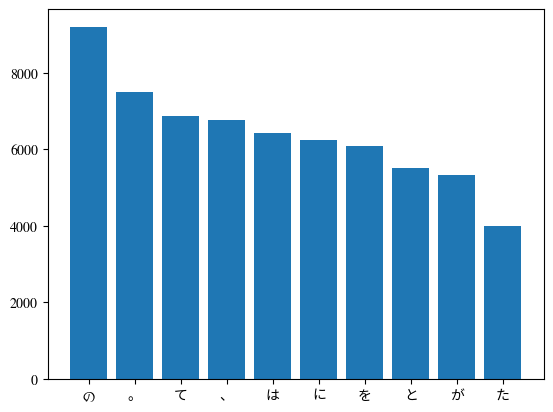

In [36]:
# 36. 頻度上位10語
import matplotlib.pyplot as plt
from mlutils.general.japanize import japanize_matplotlib

japanize_matplotlib()
top10 = counter.most_common(10)
labels, values = zip(*top10)
indexes = range(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

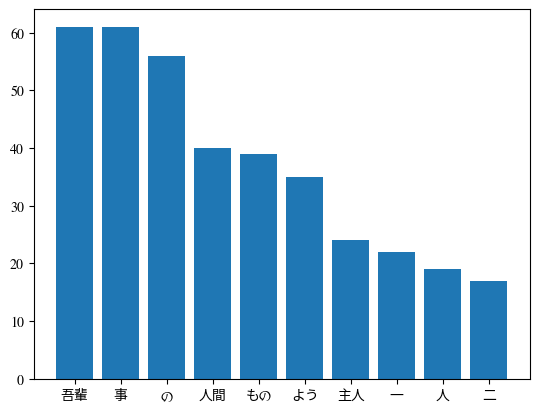

In [53]:
# 37. 「猫」と共起頻度の高い上位10語


sentences = []
sentence = []

is_inner = False
for i, token in enumerate(content):
    if token.surface != "。":
        sentence.append(token)
    else:
        sentences.append(sentence)
        sentence = []

neko_co_occurrence = Counter()
for sentence in sentences:
    if "猫" in [f.surface for f in sentence]:
        for token in sentence:
            if token.surface != "猫" and token.pos == "名詞":
                neko_co_occurrence[token.surface] += 1


top10 = neko_co_occurrence.most_common(10)
labels, values = zip(*top10)
indexes = range(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

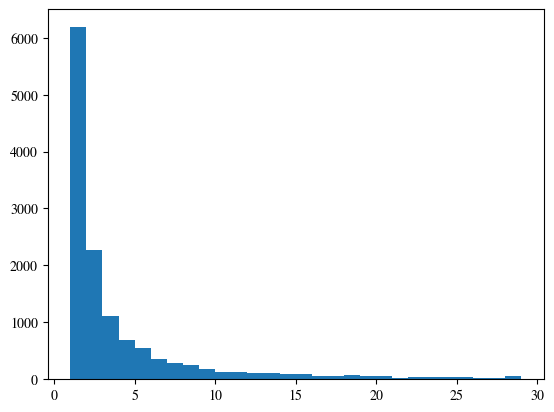

In [61]:
# 38. ヒストグラム
data = Counter([t.surface for t in content])
plt.hist(data.values(), range(1, 30))
plt.show()

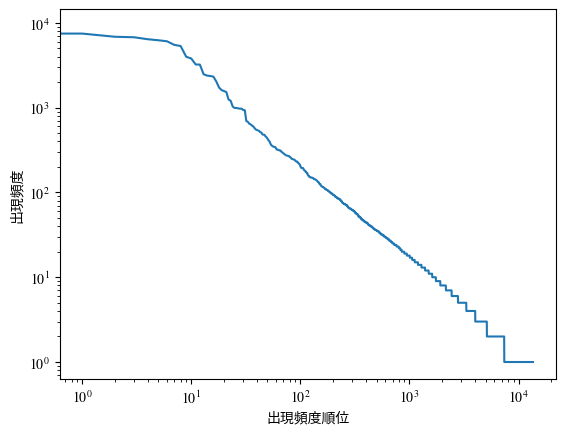

In [62]:
# 39. Zipfの法則
sorted_data = sorted(data.values(), reverse=True)
plt.plot(sorted_data)
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.xscale("log")
plt.yscale("log")
plt.show()

# 第5章 係り受け解析

In [65]:
!mkdir -p 5
!curl -X GET https://nlp100.github.io/data/ai.ja.zip -o 5/ai.ja.zip
!unzip -f 5/ai.ja.zip -d 5
!rm 5/ai.ja.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17516  100 17516    0     0   224k      0 --:--:-- --:--:-- --:--:--  225k
Archive:  5/ai.ja.zip


In [72]:
!brew install crf++ cabocha
!cabocha -f3 5/ai.ja.txt -o 5/ai.ja.txt.parsed
!sed -i '1i<document>' 5/ai.ja.txt.parsed
!echo "</document>" >> 5/ai.ja.txt.parsed

==> Auto-updating Homebrew...
To reinstall 0.58, run:
  brew reinstall crf++
To reinstall 0.69, run:
  brew reinstall cabocha


In [88]:
# 40. 係り受け解析結果の読み込み
import xml.etree.ElementTree as ET
from pathlib import Path


@dataclass
class Morph:
    surface: str  # 表層形: surface form
    pos: str  # 品詞: part of speech
    pos1: str  # 品詞細分類1: part of speech sub-category 1
    pos2: str
    pos3: str
    inflection: str  # 活用形: inflection
    conjugation: str  # 活用型: conjugation
    base: str  # 原形: base form
    reading: str = ""  # 読み
    pronunciation: str = ""  # 発音



ai_ja_parsed = Path("5/ai.ja.txt.parsed")
tree = ET.parse(ai_ja_parsed)
content = []
for sentence in tree.iter("sentence"):
    for chunk in sentence.iter("chunk"):
        for tok in chunk.iter("tok"):
            id_ = int(tok.attrib["id"])
            feats = tok.attrib["feature"].split(",")
            surface = tok.text
            morph = Morph(surface, *feats)
            content.append(morph)
    

for i, token in enumerate(content[:20]):
    print(token)

Morph(surface='人工', pos='名詞', pos1='一般', pos2='*', pos3='*', inflection='*', conjugation='*', base='人工', reading='ジンコウ', pronunciation='ジンコー')
Morph(surface='知能', pos='名詞', pos1='一般', pos2='*', pos3='*', inflection='*', conjugation='*', base='知能', reading='チノウ', pronunciation='チノー')
Morph(surface='人工', pos='名詞', pos1='一般', pos2='*', pos3='*', inflection='*', conjugation='*', base='人工', reading='ジンコウ', pronunciation='ジンコー')
Morph(surface='知能', pos='名詞', pos1='一般', pos2='*', pos3='*', inflection='*', conjugation='*', base='知能', reading='チノウ', pronunciation='チノー')
Morph(surface='（', pos='記号', pos1='括弧開', pos2='*', pos3='*', inflection='*', conjugation='*', base='（', reading='（', pronunciation='（')
Morph(surface='じん', pos='名詞', pos1='一般', pos2='*', pos3='*', inflection='*', conjugation='*', base='じん', reading='ジン', pronunciation='ジン')
Morph(surface='こうち', pos='名詞', pos1='一般', pos2='*', pos3='*', inflection='*', conjugation='*', base='こうち', reading='コウチ', pronunciation='コーチ')
Morph(surface=